<a href="https://colab.research.google.com/github/rohinish404/learning_pytorch/blob/master/Pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello world')

hello world


In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(torch.__version__)

1.13.1+cu116


In [4]:
scalar = torch.tensor(7)
scalar
scalar.ndim

0

In [5]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [6]:
scalar.item()

7

In [7]:
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

In [9]:
MATRIX = torch.tensor([[7,8],
                       [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [10]:
MATRIX.ndim

2

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [9,8,7]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [9, 8, 7]]])

In [13]:
random_tensor = torch.rand(3,4)

In [14]:
random_tensor

tensor([[0.0547, 0.0437, 0.4323, 0.2962],
        [0.0574, 0.1158, 0.2020, 0.7659],
        [0.3595, 0.2177, 0.8879, 0.1354]])

In [15]:
random_tensor.shape

torch.Size([3, 4])

In [16]:
random_tensor.device


device(type='cpu')

In [17]:
random_tensor.dtype

torch.float32

In [18]:
x = torch.arange(1.,10.)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [19]:
x_reshaped = x.reshape(1,9)
x_reshaped,x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [20]:
z = x.view(1,9)
z,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [21]:
x_stacked = torch.stack([x,x,x,x],dim=1)
x_stacked

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [22]:
x = x.reshape(1,3,3)

In [23]:
x[0]

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [24]:
x[:,2,1]

tensor([8.])

In [25]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X_new = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X_new + bias

In [26]:
X_new[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [27]:
train_split = int(0.8*len(X_new))
X_train,y_train = X_new[:train_split],y[:train_split]
X_test,y_test = X_new[train_split:],y[train_split:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [28]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
  # plt.figure(figsize(10,7))
  plt.scatter(train_data,train_labels,c='b',label='training data')
  plt.scatter(test_data,test_labels,c='g',label='testing data')

  if predictions is not None:
      plt.scatter(test_data,predictions,c='r',label='Predictions')

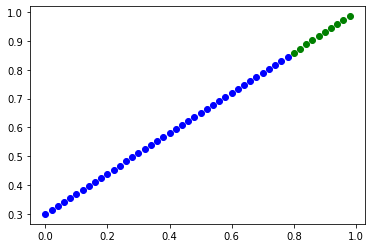

In [29]:
plot_predictions()

In [30]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad = True)
    
    self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad = True)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [56]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [57]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [58]:
with torch.inference_mode():
  y_preds = model_0(X_test)

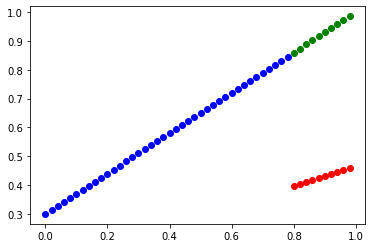

In [59]:
plot_predictions(predictions = y_preds)

In [60]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)

In [61]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)


  if epochs % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)  
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss:{test_loss}")  
    print(model_0.state_dict())

  

Epoch: 0 | Loss:0.31288138031959534 | Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 1 | Loss:0.3013603389263153 | Test loss:0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 2 | Loss:0.28983935713768005 | Test loss:0.4541231691837311
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Epoch: 3 | Loss:0.2783183455467224 | Test loss:0.44065219163894653
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Epoch: 4 | Loss:0.26679736375808716 | Test loss:0.4271811842918396
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Epoch: 5 | Loss:0.2552763521671295 | Test loss:0.41371020674705505
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Epoch: 6 | Loss:0.24375534057617188 | Test loss:0.40023916959762573
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Epoch: 7 | Loss:0.2

In [62]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

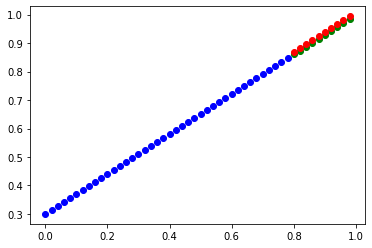

In [63]:
plot_predictions(predictions = y_preds_new)